In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pymer4 import Lmer
%matplotlib inline

In [5]:
dat = pd.read_csv("../data/study4_ug.csv")

# Scaling question
Does scaling within clinical group as opposed to across clinical group change results 

In [11]:
dat['EPE_X1_newscale'] = dat['EPE_X1']
dat['EPE_Y1_newscale'] = dat['EPE_Y1']
dat['RPE_newscale'] = dat['RPE_scale']

dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_X1_newscale'] = dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_X1'] / dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_X1'].std()
dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_Y1_newscale'] = dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_Y1'] / dat.loc[dat.cesDepress == 'Clinically_Depressed', 'EPE_Y1'].std()
dat.loc[dat.cesDepress == 'Clinically_Depressed', 'RPE_newscale'] = dat.loc[dat.cesDepress == 'Clinically_Depressed', 'RPE'] / dat.loc[dat.cesDepress == 'Clinically_Depressed', 'RPE'].std()

dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_X1_newscale'] = dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_X1'] / dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_X1'].std()
dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_Y1_newscale'] = dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_Y1'] / dat.loc[dat.cesDepress == 'Healthy_Controls', 'EPE_Y1'].std()
dat.loc[dat.cesDepress == 'Healthy_Controls', 'RPE_newscale'] = dat.loc[dat.cesDepress == 'Healthy_Controls', 'RPE'] / dat.loc[dat.cesDepress == 'Healthy_Controls', 'RPE'].std()


In [20]:
dat['cesDepress_binary'] = dat.cesDepress == 'Clinically_Depressed'

In [113]:
# filter out excluded subjects
screen_dat = pd.read_csv('../data/study4_ec.csv')
screen_dat = screen_dat.loc[screen_dat.emotion == 'neutral'].copy()
bad_ind = (screen_dat.X1 < -50) | (screen_dat.X1 > 50) | (screen_dat.Y1 < -50) | (screen_dat.Y1 > 50)
bad_subs = screen_dat.loc[bad_ind, 'sub'].unique()
dat = dat.loc[~dat['sub'].isin(bad_subs)].copy()

## Replicate paper's results

In [51]:
mdl = 'choice ~ EPE_X1_scale*cesDepress_binary + EPE_Y1_scale*cesDepress_binary + RPE_scale*cesDepress_binary + (1 + EPE_X1_scale + EPE_Y1_scale + RPE_scale|sub)'
control = """optimizer='bobyqa', optCtrl=list(maxfun=2e5)"""
lmer = Lmer(mdl, data=dat, family='binomial')
_ = lmer.fit(control=control)
_

Formula: choice~EPE_X1_scale*cesDepress_binary+EPE_Y1_scale*cesDepress_binary+RPE_scale*cesDepress_binary+(1+EPE_X1_scale+EPE_Y1_scale+RPE_scale|sub)

Family: binomial	 Inference: parametric

Number of observations: 7020	 Groups: {'sub': 351.0}

Log-likelihood: -2383.714 	 AIC: 4803.428

Random effects:

             Name    Var    Std
sub   (Intercept)  5.763  2.401
sub  EPE_X1_scale  2.023  1.422
sub  EPE_Y1_scale  0.689  0.830
sub     RPE_scale  1.703  1.305

              IV1           IV2   Corr
sub   (Intercept)  EPE_X1_scale -0.421
sub   (Intercept)  EPE_Y1_scale -0.443
sub   (Intercept)     RPE_scale  0.108
sub  EPE_X1_scale  EPE_Y1_scale -0.083
sub  EPE_X1_scale     RPE_scale -0.504
sub  EPE_Y1_scale     RPE_scale -0.165

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.731,-3.157,-2.306,0.217,0.065,0.043,0.100,0.061,0.041,0.091,-12.581,0.000,***
EPE_X1_scale,-1.806,-2.198,-1.414,0.200,0.164,0.111,0.243,0.141,0.100,0.196,-9.030,0.000,***
cesDepress_binaryTRUE,0.314,-0.275,0.904,0.301,1.369,0.759,2.469,0.578,0.432,0.712,1.044,0.296,
EPE_Y1_scale,0.495,0.224,0.766,0.138,1.640,1.251,2.150,0.621,0.556,0.683,3.582,0.000,***
RPE_scale,-1.255,-1.630,-0.879,0.192,0.285,0.196,0.415,0.222,0.164,0.293,-6.544,0.000,***
EPE_X1_scale:cesDepress_binaryTRUE,0.855,0.337,1.372,0.264,2.350,1.401,3.943,0.702,0.584,0.798,3.238,0.001,**
cesDepress_binaryTRUE:EPE_Y1_scale,-0.472,-0.835,-0.108,0.186,0.624,0.434,0.898,0.384,0.303,0.473,-2.541,0.011,*
cesDepress_binaryTRUE:RPE_scale,-0.220,-0.710,0.270,0.250,0.802,0.492,1.310,0.445,0.330,0.567,-0.881,0.378,


## Using within group scaling gives very similar results

In [52]:
mdl = 'choice ~ EPE_X1_newscale*cesDepress_binary + EPE_Y1_newscale*cesDepress_binary + RPE_newscale*cesDepress_binary + (1 + EPE_X1_newscale + EPE_Y1_newscale + RPE_newscale|sub)'
control = """optimizer='bobyqa', optCtrl=list(maxfun=2e5)"""
lmer = Lmer(mdl, data=dat, family='binomial')
_ = lmer.fit(control=control)
_

Formula: choice~EPE_X1_newscale*cesDepress_binary+EPE_Y1_newscale*cesDepress_binary+RPE_newscale*cesDepress_binary+(1+EPE_X1_newscale+EPE_Y1_newscale+RPE_newscale|sub)

Family: binomial	 Inference: parametric

Number of observations: 7020	 Groups: {'sub': 351.0}

Log-likelihood: -2388.749 	 AIC: 4813.498

Random effects:

                Name    Var    Std
sub      (Intercept)  5.795  2.407
sub  EPE_X1_newscale  1.790  1.338
sub  EPE_Y1_newscale  0.675  0.822
sub     RPE_newscale  1.560  1.249

                 IV1              IV2   Corr
sub      (Intercept)  EPE_X1_newscale -0.430
sub      (Intercept)  EPE_Y1_newscale -0.446
sub      (Intercept)     RPE_newscale  0.082
sub  EPE_X1_newscale  EPE_Y1_newscale -0.092
sub  EPE_X1_newscale     RPE_newscale -0.445
sub  EPE_Y1_newscale     RPE_newscale -0.152

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.720,-3.144,-2.296,0.216,0.066,0.043,0.101,0.062,0.041,0.091,-12.571,0.000,***
EPE_X1_newscale,-1.972,-2.379,-1.566,0.208,0.139,0.093,0.209,0.122,0.085,0.173,-9.504,0.000,***
cesDepress_binaryTRUE,0.299,-0.292,0.890,0.302,1.348,0.747,2.435,0.574,0.428,0.709,0.991,0.321,
EPE_Y1_newscale,0.493,0.222,0.764,0.138,1.637,1.248,2.146,0.621,0.555,0.682,3.563,0.000,***
RPE_newscale,-1.273,-1.647,-0.900,0.191,0.280,0.193,0.407,0.219,0.162,0.289,-6.679,0.000,***
EPE_X1_newscale:cesDepress_binaryTRUE,1.128,0.619,1.637,0.260,3.090,1.858,5.138,0.755,0.650,0.837,4.347,0.000,***
cesDepress_binaryTRUE:EPE_Y1_newscale,-0.463,-0.824,-0.101,0.185,0.630,0.439,0.904,0.386,0.305,0.475,-2.506,0.012,*
cesDepress_binaryTRUE:RPE_newscale,-0.139,-0.619,0.340,0.245,0.870,0.538,1.405,0.465,0.350,0.584,-0.570,0.569,


# Other modeling tweaks

In [149]:
# make the results more human readable
dat['unfairness_z'] = (dat.unfairness - dat.unfairness.mean()) / dat.unfairness.std()
dat['Valence_PE'] = dat['EPE_X1_newscale']
dat['Arousal_PE'] = dat['EPE_Y1_newscale']
dat['Depression'] = dat['cesDepress_binary']
dat['Reward_PE'] = dat['RPE_newscale']
dat['Unfairness'] = dat['unfairness_z']

## Results largely hold if we include unfairness in the model
With the exception of losing the significant interaction between Arousal PE and depression and gaining a significant beta for depression itself. 

In [63]:
mdl = "choice ~ Valence_PE*Depression + Arousal_PE*Depression + Reward_PE*Depression + Unfairness*Depression + (1 + Valence_PE + Arousal_PE + Reward_PE + Unfairness|sub)"
control = """optimizer='bobyqa', optCtrl=list(maxfun=2e5)"""
lmer = Lmer(mdl, data=dat, family='binomial')
_ = lmer.fit(control=control)
_

Formula: choice~Valence_PE*Depression+Arousal_PE*Depression+Reward_PE*Depression+Unfairness*Depression+(1+Valence_PE+Arousal_PE+Reward_PE+Unfairness|sub)

Family: binomial	 Inference: parametric

Number of observations: 7020	 Groups: {'sub': 351.0}

Log-likelihood: -1722.840 	 AIC: 3495.681

Random effects:

            Name     Var    Std
sub  (Intercept)  22.301  4.722
sub   Valence_PE   1.073  1.036
sub   Arousal_PE   0.531  0.729
sub    Reward_PE   1.127  1.062
sub   Unfairness   7.772  2.788

             IV1         IV2   Corr
sub  (Intercept)  Valence_PE -0.045
sub  (Intercept)  Arousal_PE -0.427
sub  (Intercept)   Reward_PE  0.029
sub  (Intercept)  Unfairness  0.113
sub   Valence_PE  Arousal_PE -0.089
sub   Valence_PE   Reward_PE -0.526
sub   Valence_PE  Unfairness -0.025
sub   Arousal_PE   Reward_PE -0.272
sub   Arousal_PE  Unfairness -0.054
sub    Reward_PE  Unfairness  0.233

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-5.158,-6.151,-4.166,0.507,0.006,0.002,0.016,0.006,0.002,0.015,-10.184,0.000,***
Valence_PE,-1.593,-2.144,-1.041,0.281,0.203,0.117,0.353,0.169,0.105,0.261,-5.664,0.000,***
DepressionTRUE,1.520,0.326,2.714,0.609,4.574,1.386,15.094,0.821,0.581,0.938,2.496,0.013,*
Arousal_PE,0.112,-0.268,0.491,0.194,1.118,0.765,1.635,0.528,0.433,0.620,0.577,0.564,
Reward_PE,0.851,0.261,1.440,0.301,2.341,1.299,4.220,0.701,0.565,0.808,2.829,0.005,**
Unfairness,5.462,4.603,6.321,0.438,235.531,99.790,555.914,0.996,0.990,0.998,12.466,0.000,***
Valence_PE:DepressionTRUE,0.909,0.291,1.528,0.316,2.482,1.337,4.607,0.713,0.572,0.822,2.881,0.004,**
DepressionTRUE:Arousal_PE,-0.282,-0.740,0.175,0.233,0.754,0.477,1.192,0.430,0.323,0.544,-1.209,0.227,
DepressionTRUE:Reward_PE,-0.404,-1.109,0.301,0.360,0.668,0.330,1.352,0.400,0.248,0.575,-1.123,0.262,
DepressionTRUE:Unfairness,-1.498,-2.445,-0.551,0.483,0.224,0.087,0.576,0.183,0.080,0.366,-3.101,0.002,**


## Results also hold if random intercepts for trial number and partner name are included

In [67]:
mdl = "choice ~ Valence_PE*Depression + Arousal_PE*Depression + Reward_PE*Depression + Unfairness*Depression + (1 + Valence_PE + Arousal_PE + Reward_PE + Unfairness|sub) + (1|trial) + (1|partnerName)"
control = """optimizer='bobyqa', optCtrl=list(maxfun=2e5)"""
lmer = Lmer(mdl, data=dat, family='binomial')
_ = lmer.fit(control=control)
_

Formula: choice~Valence_PE*Depression+Arousal_PE*Depression+Reward_PE*Depression+Unfairness*Depression+(1+Valence_PE+Arousal_PE+Reward_PE+Unfairness|sub)+(1|trial)+(1|partnerName)

Family: binomial	 Inference: parametric

Number of observations: 7020	 Groups: {'sub': 351.0, 'trial': 20.0, 'partnerName': 20.0}

Log-likelihood: -1719.481 	 AIC: 3492.963

Random effects:

                    Name     Var    Std
sub          (Intercept)  22.560  4.750
sub           Valence_PE   1.035  1.017
sub           Arousal_PE   0.511  0.715
sub            Reward_PE   1.090  1.044
sub           Unfairness   8.731  2.955
trial        (Intercept)   0.041  0.202
partnerName  (Intercept)   0.092  0.304

             IV1         IV2   Corr
sub  (Intercept)  Valence_PE -0.015
sub  (Intercept)  Arousal_PE -0.415
sub  (Intercept)   Reward_PE -0.005
sub  (Intercept)  Unfairness  0.090
sub   Valence_PE  Arousal_PE -0.096
sub   Valence_PE   Reward_PE -0.496
sub   Valence_PE  Unfairness -0.029
sub   Arousal_PE   

,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-5.310,-6.369,-4.251,0.540,0.005,0.002,0.014,0.005,0.002,0.014,-9.829,0.000,***
Valence_PE,-1.638,-2.201,-1.076,0.287,0.194,0.111,0.341,0.163,0.100,0.254,-5.707,0.000,***
DepressionTRUE,1.531,0.325,2.737,0.615,4.624,1.385,15.443,0.822,0.581,0.939,2.489,0.013,*
Arousal_PE,0.108,-0.278,0.493,0.197,1.114,0.757,1.638,0.527,0.431,0.621,0.547,0.584,
Reward_PE,0.869,0.269,1.469,0.306,2.385,1.309,4.346,0.705,0.567,0.813,2.840,0.005,**
Unfairness,5.636,4.699,6.572,0.478,280.293,109.880,715.000,0.996,0.991,0.999,11.796,0.000,***
Valence_PE:DepressionTRUE,0.947,0.321,1.573,0.319,2.577,1.378,4.819,0.720,0.579,0.828,2.964,0.003,**
DepressionTRUE:Arousal_PE,-0.270,-0.733,0.193,0.236,0.763,0.480,1.213,0.433,0.324,0.548,-1.143,0.253,
DepressionTRUE:Reward_PE,-0.393,-1.106,0.320,0.364,0.675,0.331,1.377,0.403,0.249,0.579,-1.080,0.280,
DepressionTRUE:Unfairness,-1.450,-2.433,-0.468,0.501,0.234,0.088,0.626,0.190,0.081,0.385,-2.893,0.004,**


## look at valence PE std distributions by hv and mdd

<AxesSubplot:xlabel='Valence_PE', ylabel='Count'>

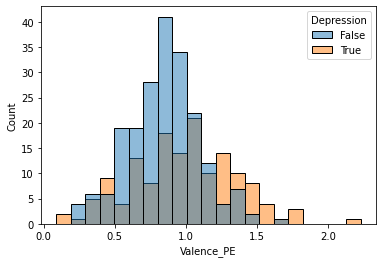

In [70]:
sns.histplot(x='Valence_PE', data=dat.groupby(["Depression", "sub"]).Valence_PE.std().reset_index(), hue="Depression")

Hmm, there's lots of overlap there. I'm a bit suspicious of their compressed range explanation.

In [114]:
emo_dat = pd.read_csv('../data/study4_ec.csv')
emo_dat['excluded'] = False
emo_dat.loc[emo_dat['sub'].isin(bad_subs), 'excluded'] = True
emo_dat['Group*Exclusion'] = emo_dat['cesDepress']
emo_dat.loc[emo_dat.excluded, 'Group*Exclusion'] = emo_dat.loc[emo_dat.excluded, 'Group*Exclusion'] + ' & Excluded'
#emo_dat = emo_dat.loc[~emo_dat['sub'].isin(bad_subs), :].copy()

In [117]:
emo_dat.groupby('Group*Exclusion')['sub'].nunique()

Group*Exclusion
Clinically_Depressed               146
Clinically_Depressed & Excluded    145
Healthy_Controls                   205
Healthy_Controls & Excluded         12
Name: sub, dtype: int64

In [122]:
emo_val_sub = emo_dat.groupby(['Group*Exclusion', "sub"]).X1.agg(['min', 'max'])

In [123]:
emo_val_sub['Valence_Range'] = emo_val_sub['max'] - emo_val_sub['min']
emo_val_sub = emo_val_sub.reset_index()

<AxesSubplot:xlabel='X1', ylabel='Count'>

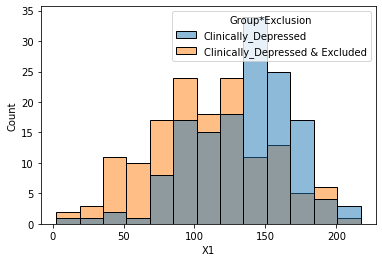

In [119]:
sns.histplot(x='X1', data=emo_dat.query('cesDepress == "Clinically_Depressed"').groupby(["Group*Exclusion", "sub"]).X1.std().reset_index(), hue="Group*Exclusion")

<AxesSubplot:xlabel='Valence_Range', ylabel='Count'>

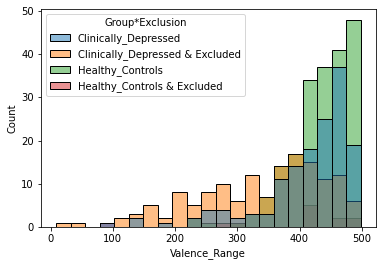

In [125]:
sns.histplot(x='Valence_Range', data=emo_val_sub, hue="Group*Exclusion")

In [97]:
norm_range_subs = emo_val_sub.loc[emo_val_sub.Valence_Range > 300, 'sub'].values

In [101]:
screen_dat.loc[screen_dat['sub'].isin(bad_subs)].groupby('cesDepress').count()

,sub,trial,emotion,X1,Y1,RT,cesScore,tepsAnt,tepsCon,tepsTotal,...,aesOth,aesTotal,tasDesFeel,tasIdeFeel,tasExtThink,tasTotal,tasLabel,age,gender,study
cesDepress,,,,,,,,,,,,,,,,,,,,,
Clinically_Depressed,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
Healthy_Controls,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [128]:
pd.set_option("display.max_rows", 999)


In [135]:
neutral_dat = emo_dat.query("emotion == 'neutral'").copy()
neutral_dat['Valence'] = neutral_dat.X1
neutral_dat['Arousal'] = neutral_dat.Y1

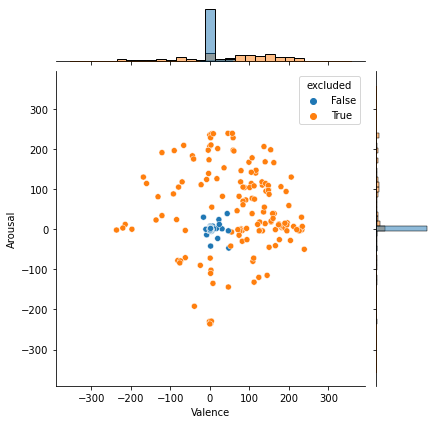

In [148]:
g = sns.jointplot(x='Valence', y='Arousal', data=neutral_dat.query('cesDepress == "Clinically_Depressed"'), hue="excluded")
g.plot_marginals(sns.histplot)
g.fig.set_facecolor('white')

In [147]:
dir(g.fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutgrid',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_rasterized',
 '_r

In [129]:
emo_dat.groupby(['emotion', "Group*Exclusion"])[['X1', 'Y1']].agg(['mean', 'std'])

X1              \
                                                    mean         std   
emotion      Group*Exclusion                                           
afraid       Clinically_Depressed            -121.082192   89.235875   
             Clinically_Depressed & Excluded    0.620690  131.256379   
             Healthy_Controls                -164.024390   65.833900   
             Healthy_Controls & Excluded      -81.333333  126.187691   
angry        Clinically_Depressed            -146.849315   96.661895   
             Clinically_Depressed & Excluded  -13.496552  136.534139   
             Healthy_Controls                -185.951220   64.224236   
             Healthy_Controls & Excluded      -92.500000  143.369516   
annoyed      Clinically_Depressed            -106.342466  103.315482   
             Clinically_Depressed & Excluded   14.393103  128.381230   
             Healthy_Controls                -142.565854   71.043633   
             Healthy_Controls & Excluded     -128.666667  118.354117   
aroused      Clinically_Depressed              41.479452   95.977815   
             Clinically_Depressed & Excluded   38.427586  115.674636   
             Healthy_Controls                  51.785366   75.488168   
             Healthy_Controls & Excluded       74.333333   96.289651   
calm         Clinically_Depressed              95.801370   87.718879   
             Clinically_Depressed & Excluded   66.303448  119.800605   
             Healthy_Controls                 102.541463   89.982212   
             Healthy_Controls & Excluded      118.333333   97.020460   
disappointed Clinically_Depressed            -123.226027   91.486707   
             Clinically_Depressed & Excluded  -21.055172  132.689005   
             Healthy_Controls                -159.658537   58.668398   
             Healthy_Controls & Excluded     -116.416667  110.608612   
disgusted    Clinically_Depressed            -127.698630  107.752486   
             Clinically_Depressed & Excluded   12.103448  128.562497   
             Healthy_Controls                -178.785366   67.871727   
             Healthy_Controls & Excluded     -118.583333  131.052008   
enthusiastic Clinically_Depressed             141.547945   97.125804   
             Clinically_Depressed & Excluded   63.034483  103.455265   
             Healthy_Controls                 165.921951   68.282098   
             Healthy_Controls & Excluded      161.583333   85.110045   
happy        Clinically_Depressed             172.301370   71.923750   
             Clinically_Depressed & Excluded  102.931034  100.479037   
             Healthy_Controls                 188.004878   53.710507   
             Healthy_Controls & Excluded      152.250000   89.975881   
nervous      Clinically_Depressed             -91.636986   85.670490   
             Clinically_Depressed & Excluded   -6.213793  129.375433   
             Healthy_Controls                -109.887805   75.455818   
             Healthy_Controls & Excluded      -42.083333  151.110109   
neutral      Clinically_Depressed               2.376712    8.119912   
             Clinically_Depressed & Excluded   70.641379  106.647764   
             Healthy_Controls                   1.024390    3.913825   
             Healthy_Controls & Excluded       11.833333  160.270132   
peppy        Clinically_Depressed              92.568493   90.455164   
             Clinically_Depressed & Excluded   47.455172  109.481415   
             Healthy_Controls                 117.209756   79.662154   
             Healthy_Controls & Excluded       82.166667   93.709254   
quiet        Clinically_Depressed              39.006849   86.570561   
             Clinically_Depressed & Excluded   78.448276  109.743510   
             Healthy_Controls                  38.482927   69.921777   
             Healthy_Controls & Excluded       11.916667  170.904257   
relaxed      Clinically_Depressed             124.205479   84.279004   
             Clinicall